# Лабораторна робота 3
### Студента групи МІТ-31 (підгрупа 1)
### Дриги Михайла Сергійовича

## Завдання
1. Створити набір даних за допомогою DatasetGenerator
2. Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)
3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для клаcифікації на основі звичайних можливостей Python.
4. Для отриманих наборів даних провести встановленні кроки моделювання.
5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

## Завдання 1

In [29]:
X, y = make_regression(n_samples=512, n_features=10, n_informative=512, n_targets=1,  noise=0.0, shuffle=True, coef=False, random_state=None)

print(X,y)

[[ 0.87453855  1.60697526 -0.06224225 ...  1.00109155 -0.73981705
   2.81200035]
 [-1.24768284 -0.6998412   0.78386677 ... -0.82808266 -0.28820743
   0.72868609]
 [ 0.98706309  2.42401702 -0.29089587 ... -1.05239522 -3.17701498
  -0.839968  ]
 ...
 [ 0.48648102  2.53689529 -1.55792314 ...  1.03672257 -1.83633013
   1.33876513]
 [ 0.02815324  1.99327438  1.59844397 ... -1.23493567  1.26917436
  -0.17365715]
 [-1.76400325  1.24166095  0.78978495 ... -0.76355873 -0.17423189
  -0.27479063]] [ 114.36015613   38.4181672   -23.73999947  -41.99303918 -106.58951247
  203.18579431  240.60769703  316.41698968  -35.1799752   -76.66347493
 -129.20642187  -85.06462333 -121.0093161    15.27760287   28.78631488
   88.04104618 -107.79416912 -128.27541429   33.50624448 -376.97034372
  -52.15536076   -0.53086625  104.75214022  132.37676753   30.23507575
  262.73411116  -82.26433808   61.44111765  -57.57988104 -221.91490684
  -36.00617087   48.28605     201.02508348  -53.120492    201.58339426
   47.41095

In [30]:
df = pd.DataFrame(X, y)
df.to_csv('sk_data_set.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9
114.360156,0.874539,1.606975,-0.062242,-0.198279,1.205939,-1.929776,0.929104,1.001092,-0.739817,2.812000
38.418167,-1.247683,-0.699841,0.783867,-1.349188,-0.208431,1.021989,1.016905,-0.828083,-0.288207,0.728686
-23.739999,0.987063,2.424017,-0.290896,-1.693526,-0.201513,2.112351,0.973363,-1.052395,-3.177015,-0.839968
-41.993039,0.340824,0.019927,0.145136,0.081198,-0.104949,-1.201512,0.405038,1.556333,0.512790,-0.498131
-106.589512,-0.502500,-0.574906,-0.851030,0.723666,-1.349958,-0.772647,0.584926,2.354195,1.481124,0.676591


## Завдання 2

In [47]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.replace({"female":0, "male":1, "no":0, "yes":1}, None, True)

In [49]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,northwest,10600.5483
1334,18,0,31.92,0,0,northeast,2205.9808
1335,18,0,36.85,0,0,southeast,1629.8335
1336,21,0,25.80,0,0,southwest,2007.9450
1337,61,0,29.07,0,1,northwest,29141.3603


In [50]:
print(df.shape)

(1338, 7)


In [51]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [52]:
print(df.groupby('region').size())

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


C:\Users\Mkarlos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


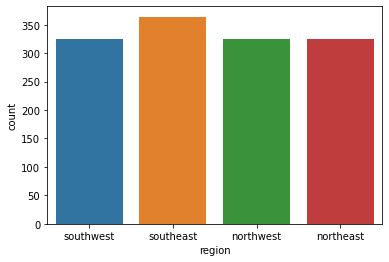

In [53]:
sns.countplot(df['region'],label="Count")
plt.show()

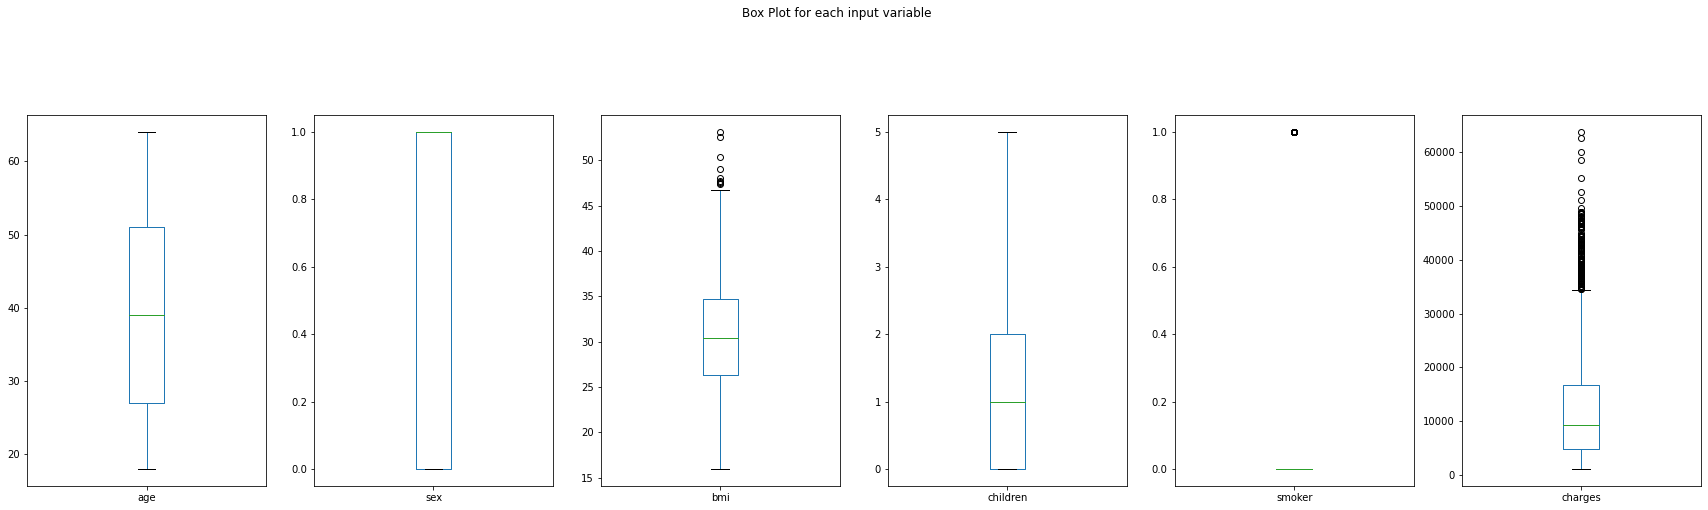

In [54]:
df.drop('region', axis=1).plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=(30,15), 
                                        title='Box Plot for each input variable')
plt.savefig('data_box_plot')
plt.show()

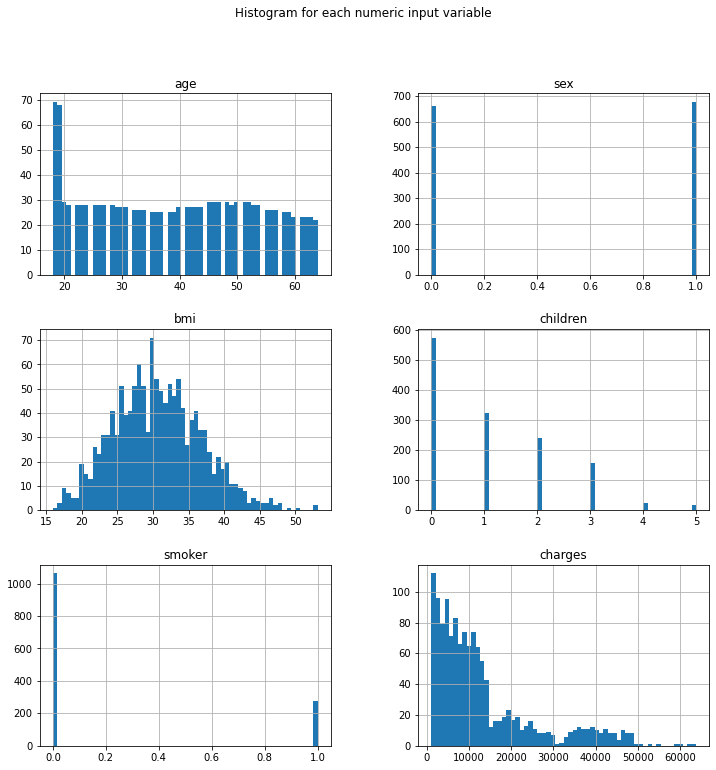

In [55]:
import pylab as pl
df.drop('region' ,axis=1).hist(bins=60, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('data_hist')
plt.show()

In [56]:
import sklearn.model_selection
import sklearn.datasets
from sklearn.datasets import make_classification

X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),) 

model2 = pd.DataFrame(data={'X':[np.random.uniform(-4.0, 4.0) for i in range(1000)],'Y':[np.random.uniform(-300.0, 300.0) for i in range(1000)],'Z':['90.0' for i in range(1000)]})

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.91


In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.86


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


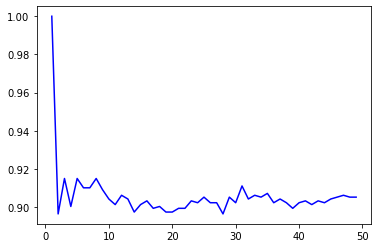

In [61]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

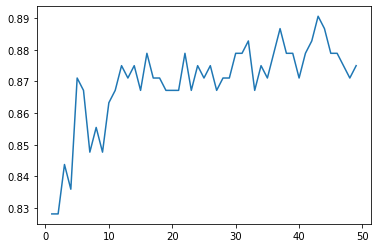

In [62]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.875

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.91


In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.92
Accuracy of GNB classifier on test set: 0.88


In [66]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.91


In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[106  20]
 [ 12 118]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       126
           1       0.86      0.91      0.88       130

    accuracy                           0.88       256
   macro avg       0.88      0.87      0.87       256
weighted avg       0.88      0.88      0.87       256



C:\Users\Mkarlos\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


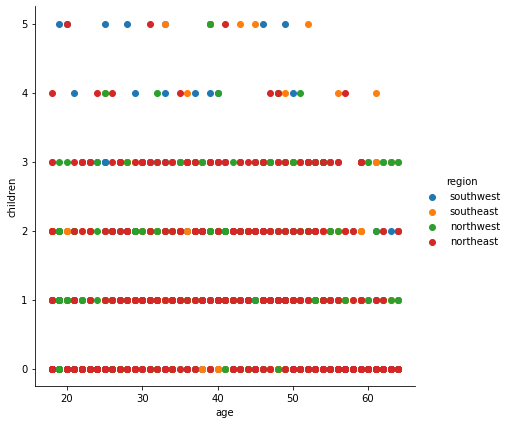

In [68]:
sns.FacetGrid(df, hue="region", size=6) \
   .map(plt.scatter, "age", "children") \
   .add_legend()

plt.show()

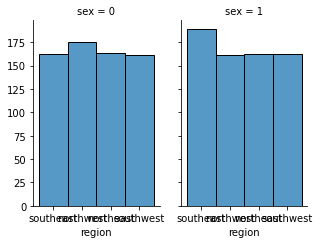

In [69]:
g = sns.FacetGrid(df, col="sex", height=3.5, aspect=.65)
g.map(sns.histplot, "region")

## Завдання 3

In [70]:
import random as rnd

sex = {0:'Man', 1:'Woman'}
age = {0:'<20', 1:'>20'}
certificate = {0:'have', 1:'dont have'}
student = {0:'YES', 1:'NO'}
numb_of_certif = {0:'0', 1:'1', 2:'2', 3:'More than 3'}
language = {0:'Ukraine', 1:'Russia', 2:'English', 3:'Italia', 4:'France', 5:'Germany', 6:'Romania'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(sex[rnd.randint(0, 1)])
    row.append(age[rnd.randint(0, 1)])
    row.append(certificate[rnd.randint(0, 1)])
    row.append(student[rnd.randint(0, 1)])
    row.append(numb_of_certif[rnd.randint(0, 3)])
    row.append(language[rnd.randint(0, 6)])
    data.append(row)
df = pd.DataFrame(data, columns=['main_points', 'extra_points', 'sex', 'age', 'certificate', 'student', 'numb_of_certif', 'language'])

In [71]:
df.replace({'Man': 0, 'Woman':1, '<20': 0, '>20':1, 'have':0, 'dont have':1, 'YES':0, 'NO':1, '0':0, '1':1, '2':2, 'More than 3':3, 'Ukraine': 0
, 'Russia':1, 'English':2, 'Italia':3, 'France':4, 'Germany':5, 'Romania':6}, None, True)

df.to_csv('my_data_set.csv')

In [72]:
df.head()

,main_points,extra_points,sex,age,certificate,student,numb_of_certif,language
0,49.93,3.64,0,1,1,1,1,4
1,13.04,6.88,0,0,0,1,3,3
2,34.76,8.41,0,0,1,1,1,5
3,25.04,6.30,1,1,0,1,0,4
4,18.19,7.12,1,0,0,1,3,1


In [73]:
df.tail()

,main_points,extra_points,sex,age,certificate,student,numb_of_certif,language
507,7.51,5.51,1,1,1,1,0,4
508,45.02,9.45,1,1,0,1,0,1
509,1.74,7.76,1,0,0,1,1,0
510,5.31,7.75,1,1,0,0,0,4
511,22.30,9.11,1,1,0,0,3,2


In [74]:
print("language")
print(df['language'].unique())

language
[4 3 5 1 2 6 0]


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_points     512 non-null    float64
 1   extra_points    512 non-null    float64
 2   sex             512 non-null    int64  
 3   age             512 non-null    int64  
 4   certificate     512 non-null    int64  
 5   student         512 non-null    int64  
 6   numb_of_certif  512 non-null    int64  
 7   language        512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [76]:
df.describe()

,main_points,extra_points,sex,age,certificate,student,numb_of_certif,language
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,25.541387,5.673965,0.515625,0.490234,0.492188,0.511719,1.478516,2.937500
std,14.378250,2.634556,0.500245,0.500394,0.500428,0.500352,1.122413,2.002933
min,1.310000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.190000,3.560000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,25.075000,5.835000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,38.015000,8.022500,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000
max,49.990000,9.920000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000


C:\Users\Mkarlos\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


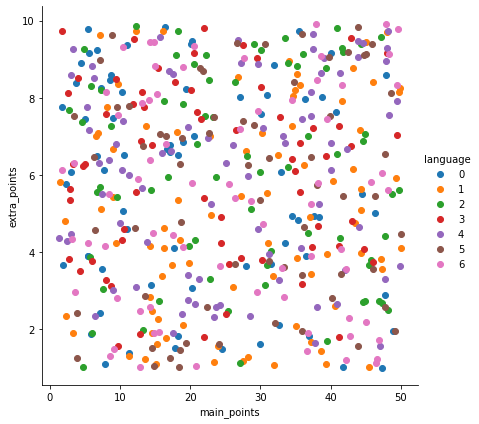

In [77]:
sns.FacetGrid(df, hue="language", size=6) \
   .map(plt.scatter, "main_points", "extra_points") \
   .add_legend()

plt.show()

In [78]:
features = list(df.columns[1:7])            	
target = df.columns[7]                     

print('Features:',features)
print('Target:',target)

X = df.iloc[:,1:7]                         

y = df.iloc[:,7]                           


print(y.shape)
print(X.shape)

Features: ['extra_points', 'sex', 'age', 'certificate', 'student', 'numb_of_certif']
Target: language
(512,)
(512, 6)


In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedlanguage'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [0 1 2 3 4 5 6]
Response variable after encoding: [4 3 5 4 1 2 6 3 5 5 0 3 6 4 4 6 0 3 0 4 0 3 0 0 4 6 6 3 6 3 3 1 2 0 0 0 1
 1 5 5 2 2 2 0 6 6 0 1 3 1 3 1 4 5 5 1 5 0 6 0 4 6 0 4 5 2 3 5 4 3 0 5 5 6
 3 1 1 3 0 2 0 1 4 3 2 4 2 2 6 1 0 4 5 2 4 4 0 6 2 4 3 3 0 3 2 4 1 0 4 4 6
 1 6 2 2 0 6 4 5 0 2 1 5 1 6 6 3 1 4 3 5 0 4 5 3 0 4 4 1 6 1 5 0 5 0 0 0 6
 1 1 2 6 3 5 0 0 0 2 2 6 4 2 3 4 3 5 1 4 3 6 0 6 4 1 4 1 0 5 6 2 2 0 4 4 0
 3 2 2 4 2 5 1 6 1 3 0 2 5 5 2 2 1 4 1 5 6 0 4 1 2 1 1 2 2 1 1 1 3 2 1 0 1
 2 2 1 2 1 0 6 5 0 0 6 5 5 1 6 6 2 5 0 6 1 6 6 5 4 2 3 6 4 0 4 2 6 6 3 0 4
 1 3 1 5 2 3 0 2 4 6 6 0 6 0 6 4 3 0 6 2 3 6 6 1 5 1 0 6 0 3 1 2 4 1 0 4 3
 4 1 1 2 5 3 0 1 4 0 5 2 6 5 1 4 3 3 5 1 3 6 2 4 5 5 6 3 6 6 3 5 0 6 3 1 2
 4 5 6 6 1 1 3 0 6 2 5 0 5 6 2 4 4 4 2 5 3 5 1 1 4 3 6 6 5 1 6 5 6 4 4 1 2
 4 4 5 1 0 5 2 2 1 3 2 0 3 2 4 3 4 0 4 4 4 4 0 3 3 2 1 0 4 1 1 1 6 1 6 5 5
 5 4 3 0 6 0 3 2 2 1 2 3 4 1 4 2 1 0 4 6 3 0 5 3 3 1 4 1 4 1 2 6 5 6 1 5 1
 3 5 1 6 1 1 6 6 3 0 0 3 2 3 4 2 2 0 4 4 

,main_points,extra_points,sex,age,certificate,student,numb_of_certif,language,Encodedlanguage
502,47.73,3.30,0,0,0,1,0,4,4
503,10.42,5.06,1,1,0,0,1,0,0
504,27.97,3.65,1,1,1,1,1,0,0
505,19.66,7.24,1,0,1,1,0,4,4
506,19.65,2.77,0,0,0,1,1,4,4
507,7.51,5.51,1,1,1,1,0,4,4
508,45.02,9.45,1,1,0,1,0,1,1
509,1.74,7.76,1,0,0,1,1,0,0
510,5.31,7.75,1,1,0,0,0,4,4
511,22.30,9.11,1,1,0,0,3,2,2


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [83]:
value = knn.predict([[3, 5, 6, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedlanguage'] == 2, 'language'].values[0])

prediction value: [0]
Predicted Class 2


In [84]:
X_new = [[3, 5, 6, 4, 2, 1], [6, 5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([0, 4], dtype=int64)

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

print(knn.predict(X_new))

kypred = knn.predict(X)

[0 4]


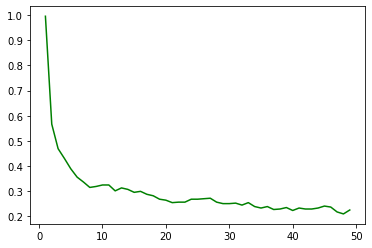

In [87]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

In [88]:

from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.388671875


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [90]:
print(X_train.shape)
print(y_train.shape)

(307, 6)
(307,)


In [91]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.16585365853658537

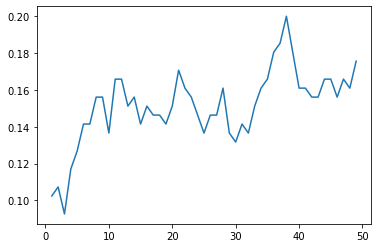

In [93]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()